In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=9
CHANNEL=3


In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Tomato by us",
                                                            shuffle=True,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE
                                                           )

Found 713 files belonging to 4 classes.


In [4]:
class_names=dataset.class_names
class_names

['Semi_ripped', 'Unripped', 'ripe', 'rotten']

In [5]:
n_classes = len(dataset.class_names)  # e.g., 6
n_classes

4

In [6]:
len(dataset)

80

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[1])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
#batch lagayeko image ma
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    #euta batch ma vayeko shape ra numpy
    #tesnor is converted into tensor

(9, 256, 256, 3)
[2 0 3 2 3 2 2 3 3]


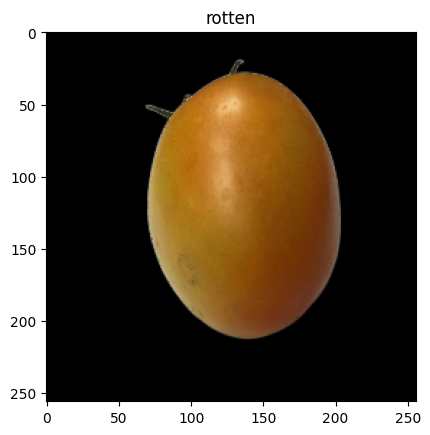

In [9]:
#printng one image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [10]:
len(dataset)

80

In [11]:
train_size=0.8
len(dataset)*train_size

64.0

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [13]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [15]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2)
# ])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])



In [16]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 2  # Example: good vs bad tomato

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2), padding='same'),

    #  layers.Conv2D(32, (3, 3), activation='relu', padding='same',  input_shape=input_shape),
    # layers.AveragePooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Build and show model summary
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,068,132 (4.07 MB)

 Trainable params: 1,068,132 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history=model.fit(
    train_ds,
    epochs=100,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 530ms/step - accuracy: 0.3731 - loss: 1.2562 - val_accuracy: 0.6667 - val_loss: 0.9295
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.5967 - loss: 0.9311 - val_accuracy: 0.7361 - val_loss: 0.6984
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.7358 - loss: 0.6527 - val_accuracy: 0.7083 - val_loss: 0.7137
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.7324 - loss: 0.6465 - val_accuracy: 0.7222 - val_loss: 0.6543
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.7445 - loss: 0.6320 - val_accuracy: 0.7778 - val_loss: 0.4866
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.7494 - loss: 0.5388 - val_accuracy: 0.7500 - val_loss: 0.5583
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.7424 - loss: 0.5965 - val_accuracy: 0.6944 - val_loss: 0.5798
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.7987 - loss: 0.4379 - 

In [19]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9682 - loss: 0.0817


In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


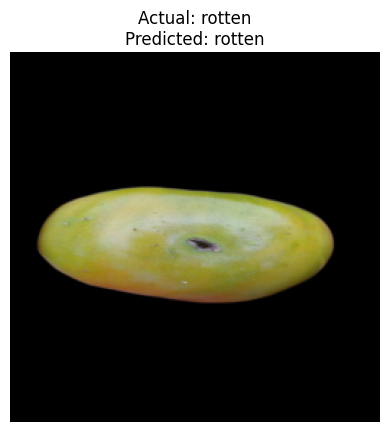

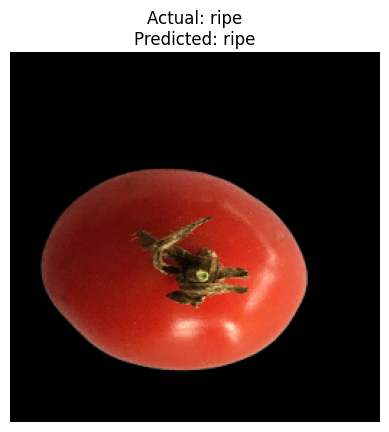

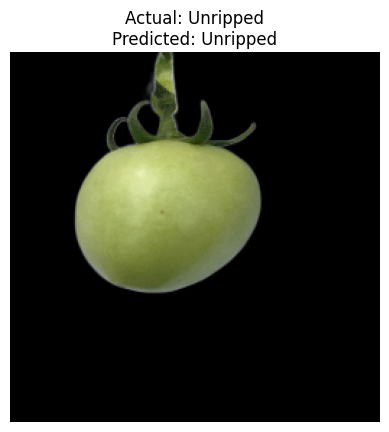

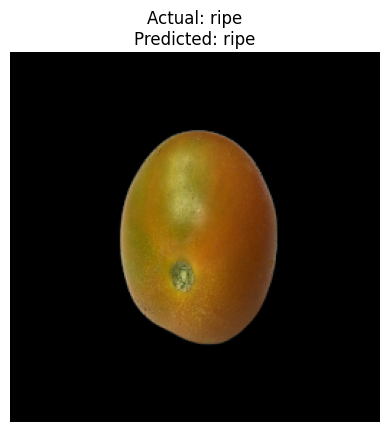

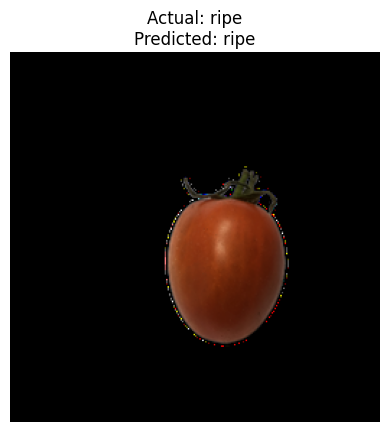

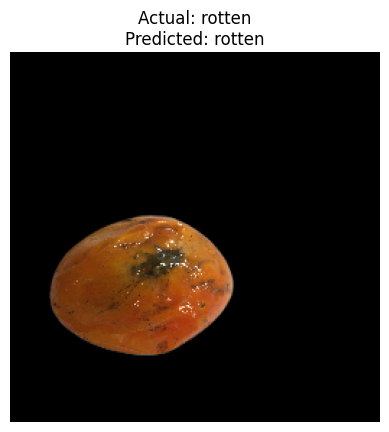

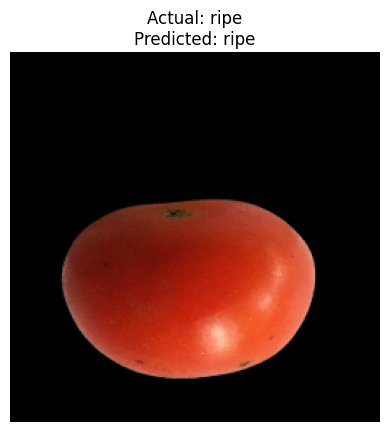

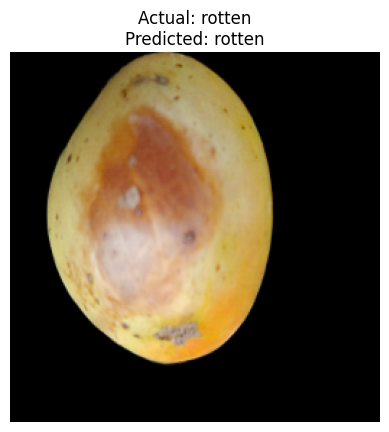

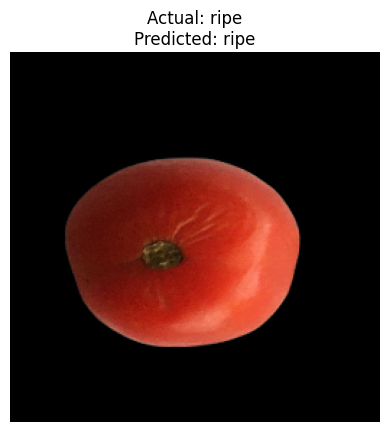

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


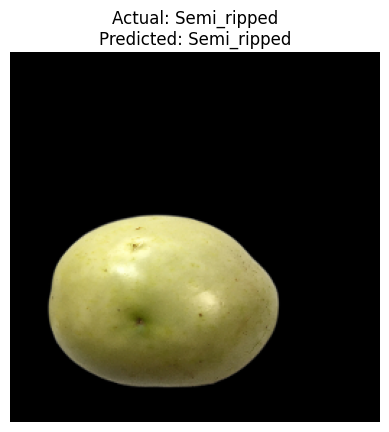

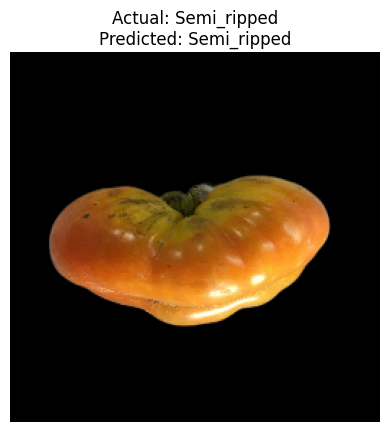

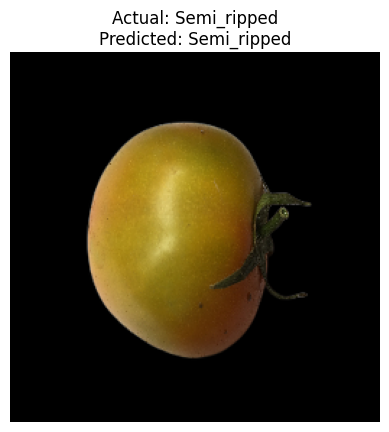

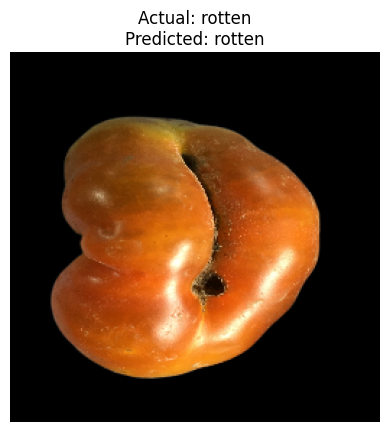

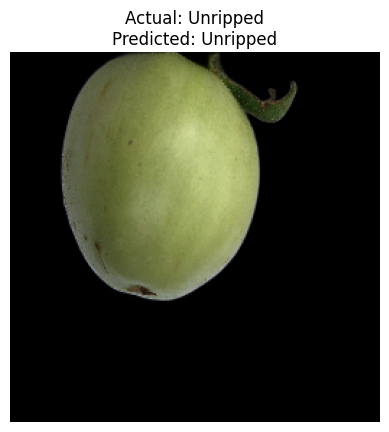

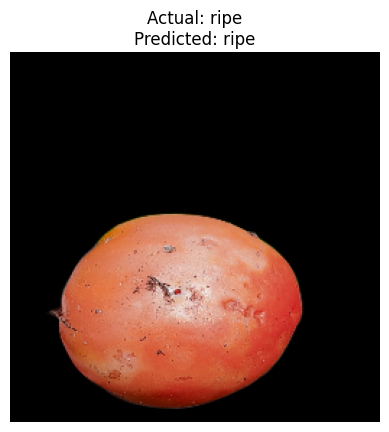

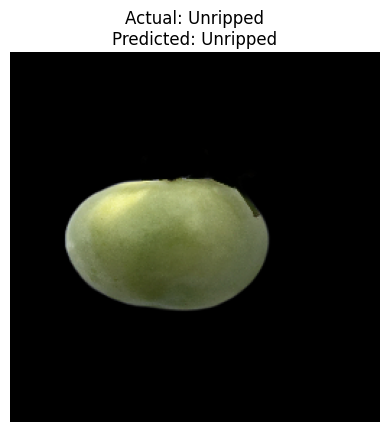

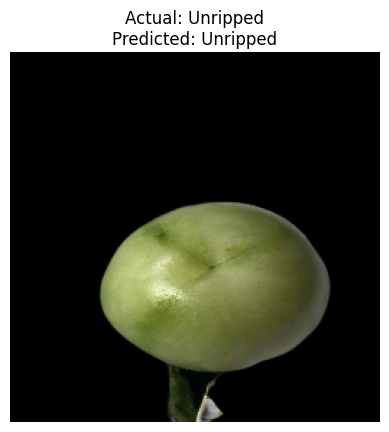

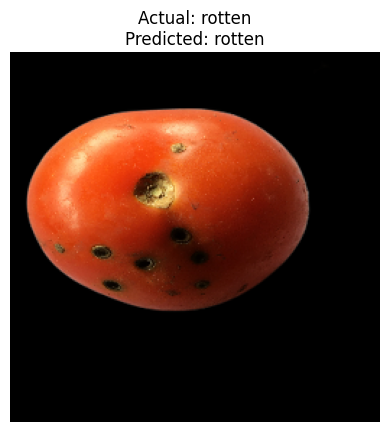

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


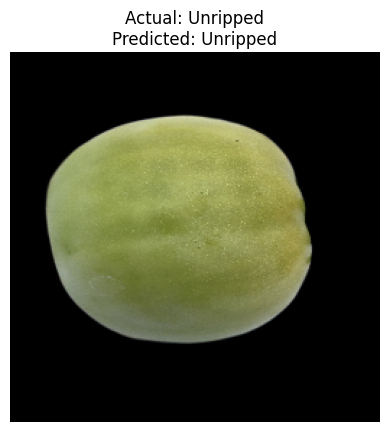

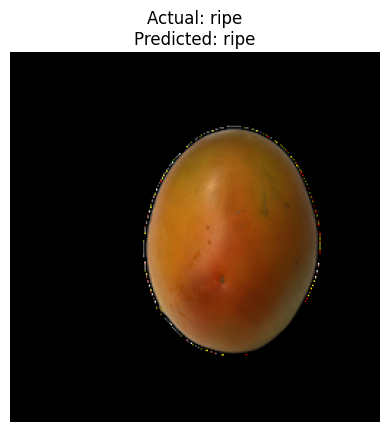

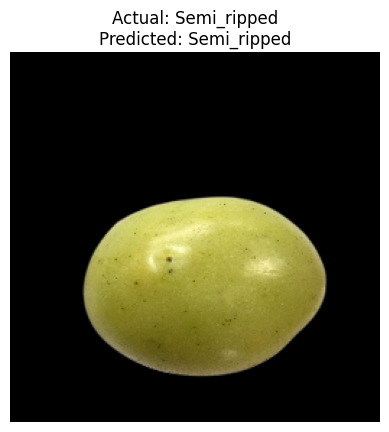

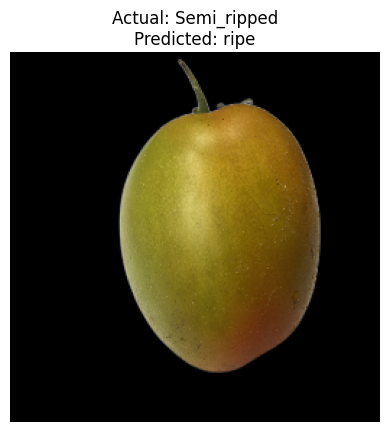

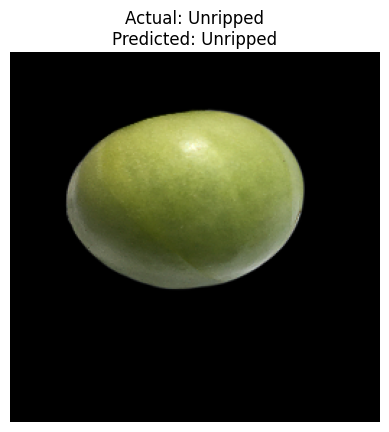

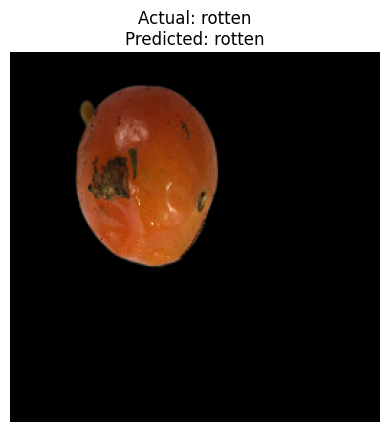

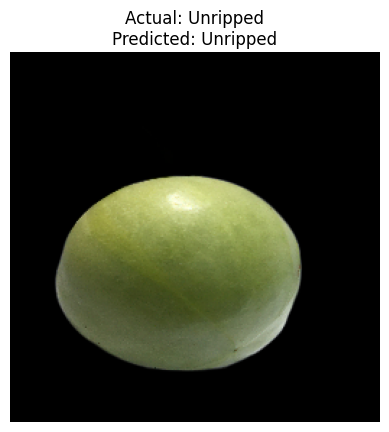

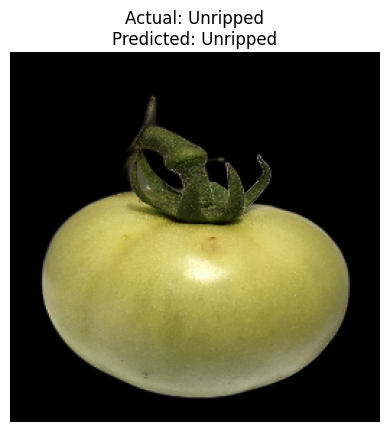

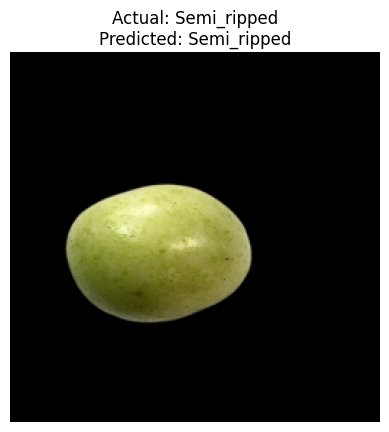

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


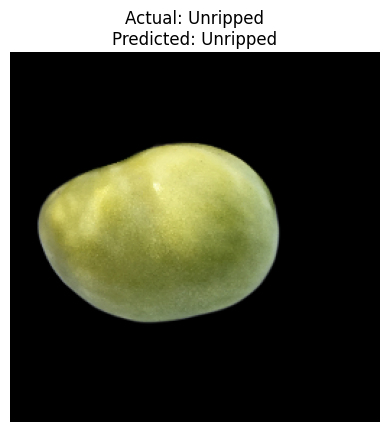

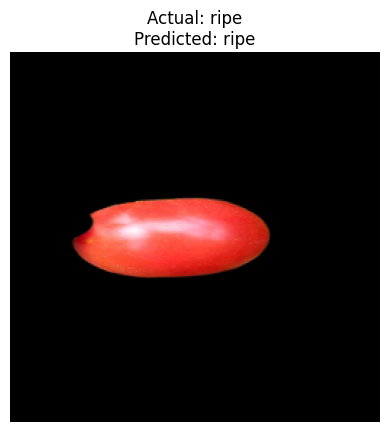

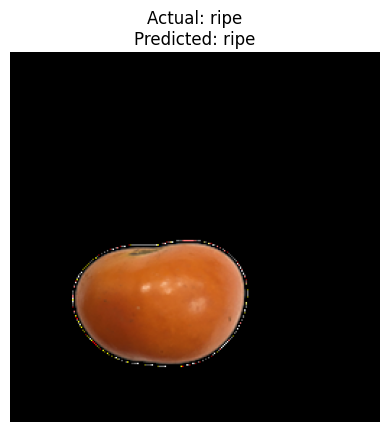

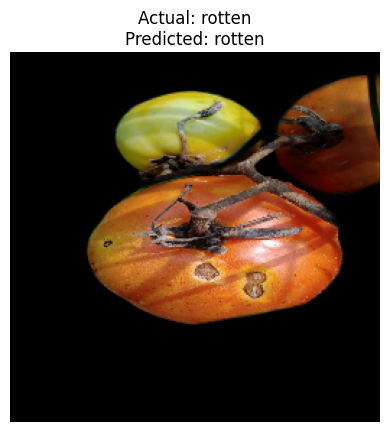

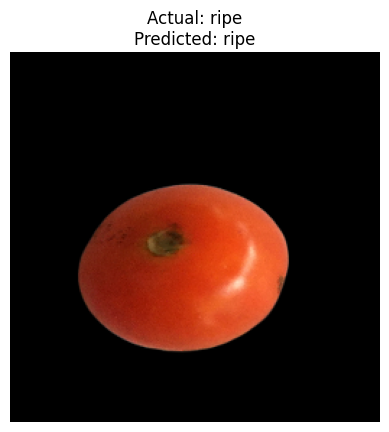

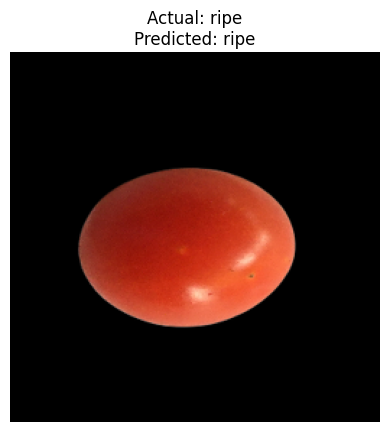

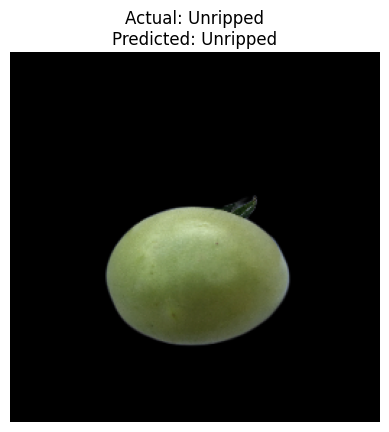

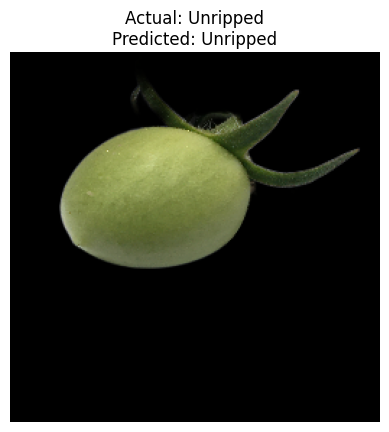

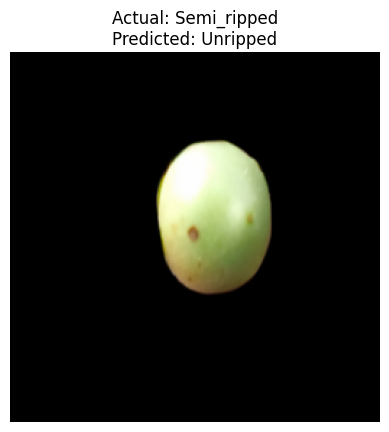

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


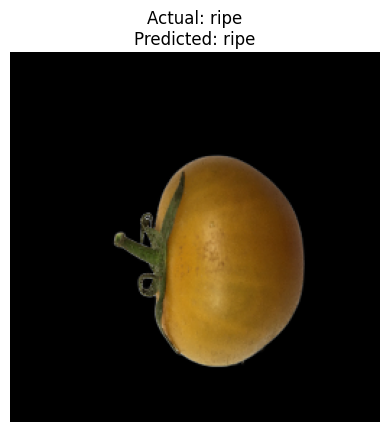

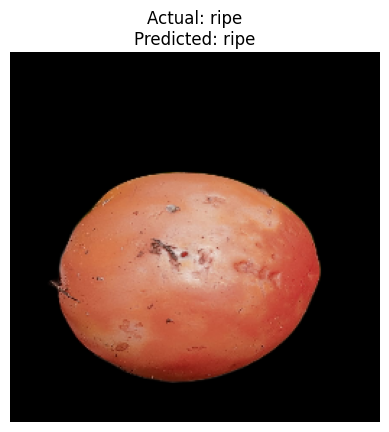

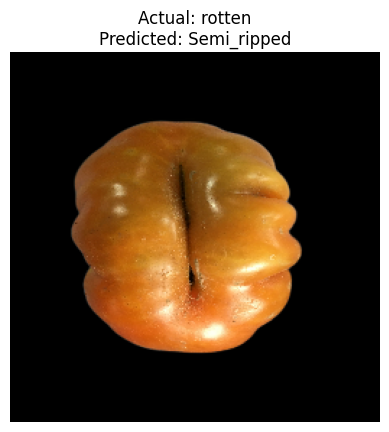

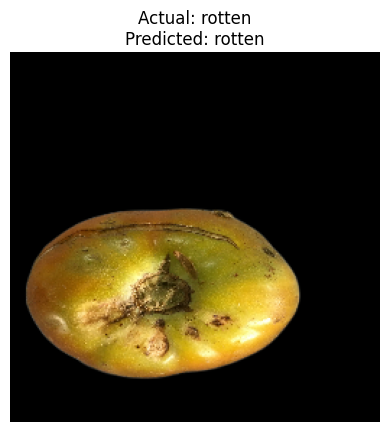

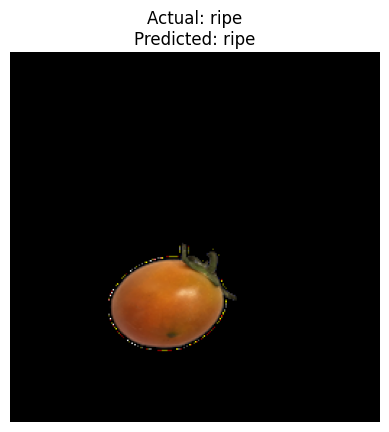

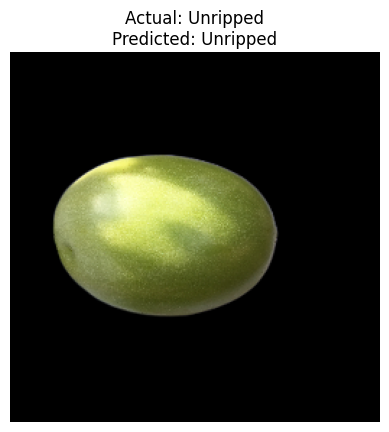

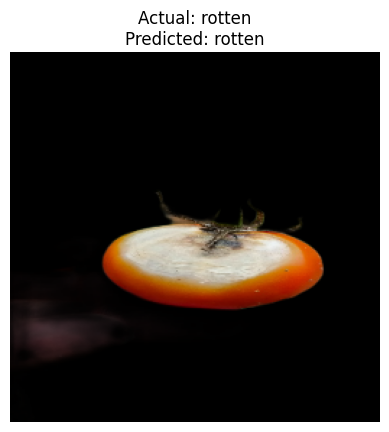

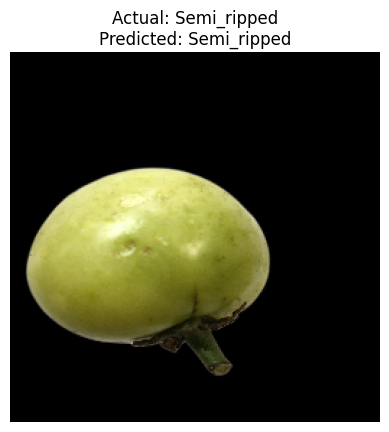

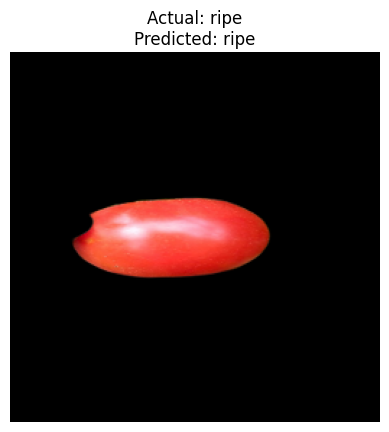

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


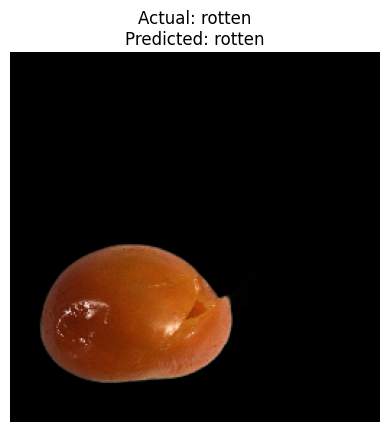

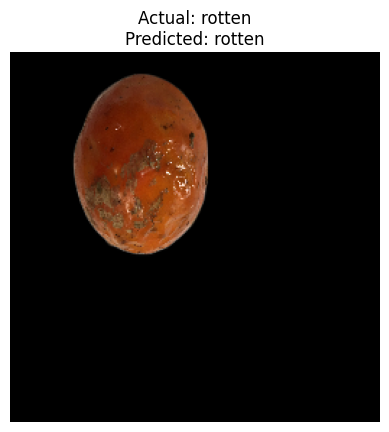

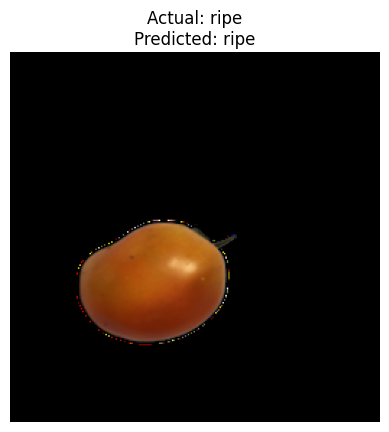

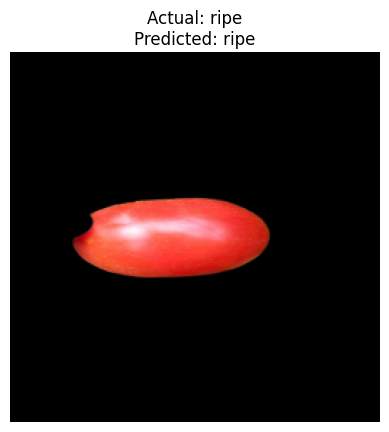

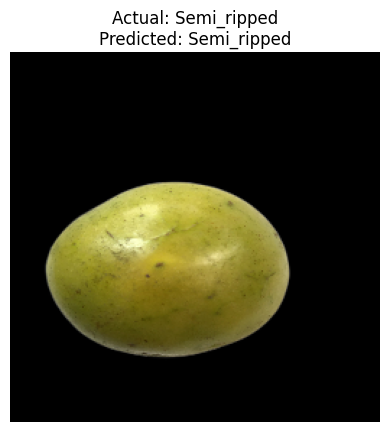

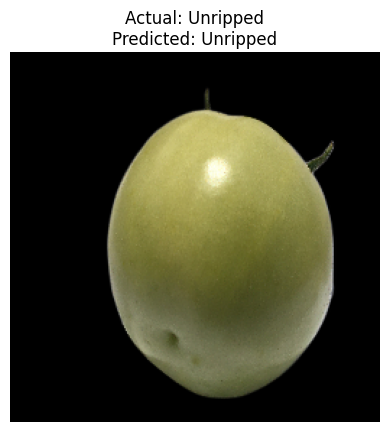

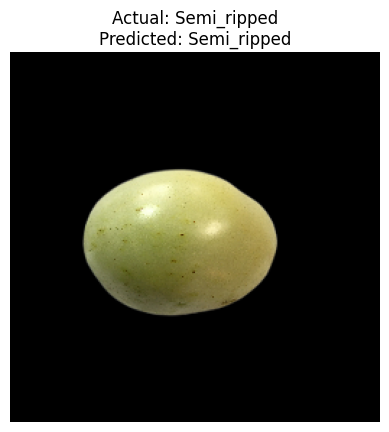

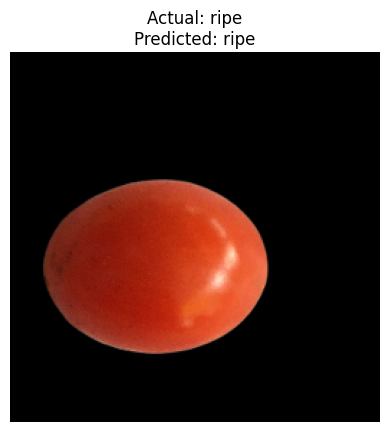

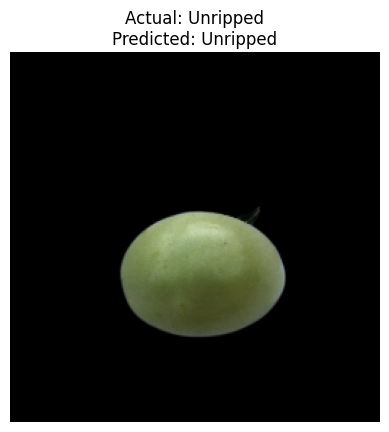

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


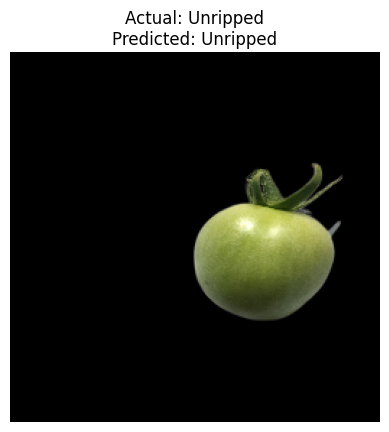

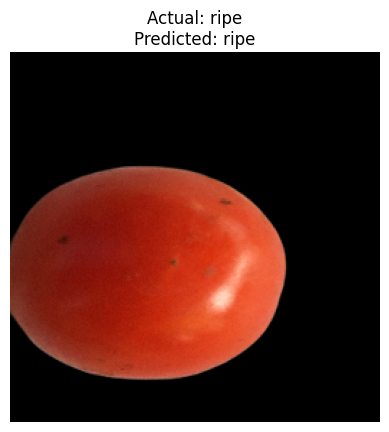

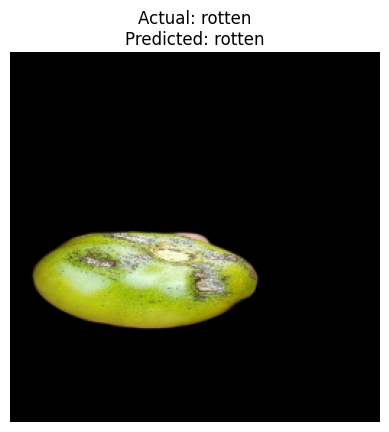

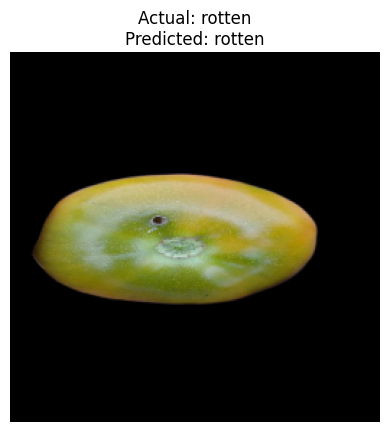

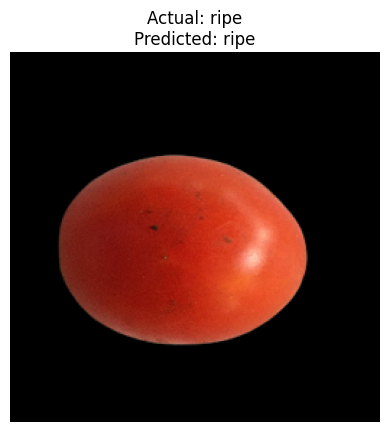

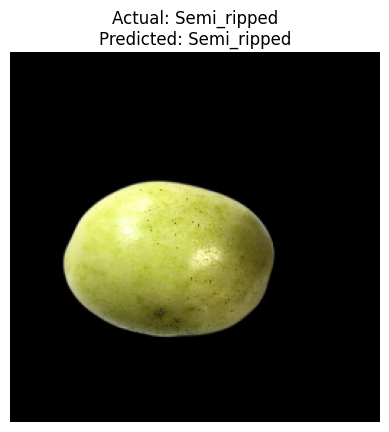

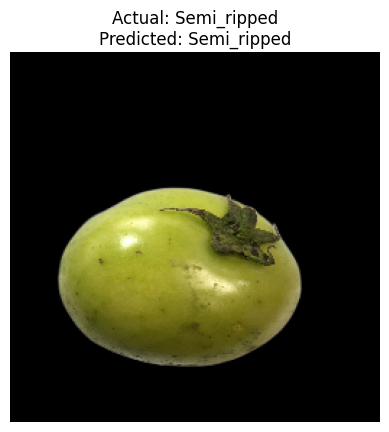

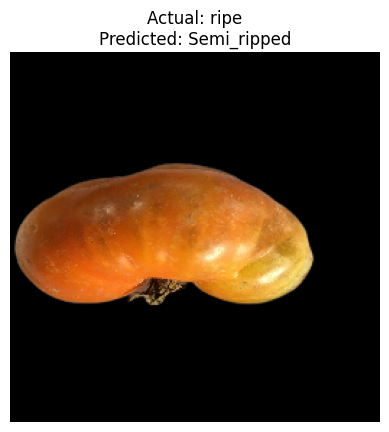

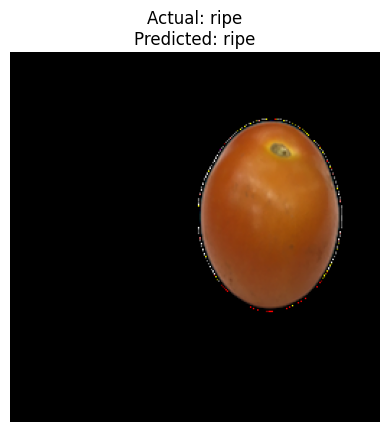

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


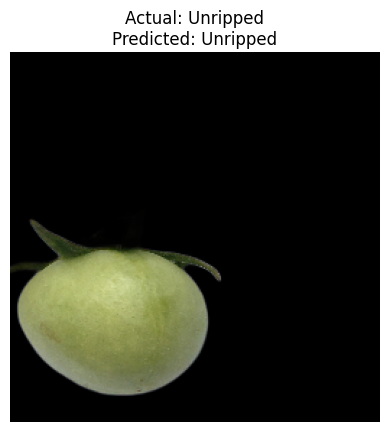

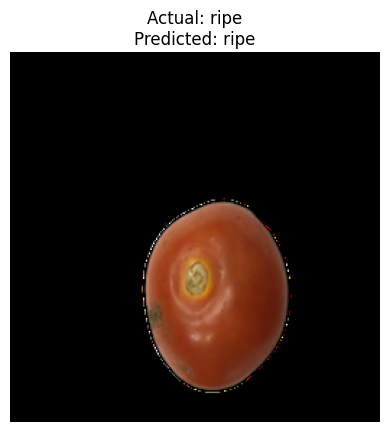

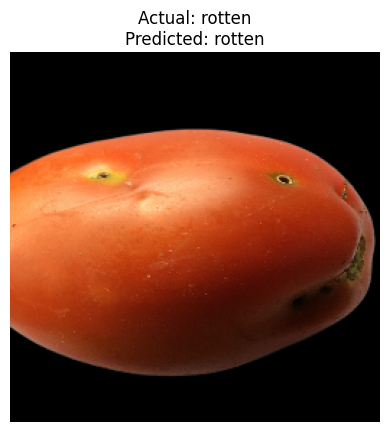

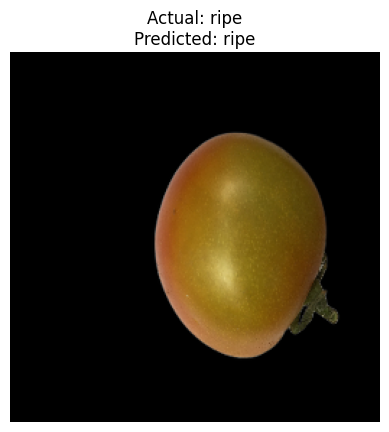

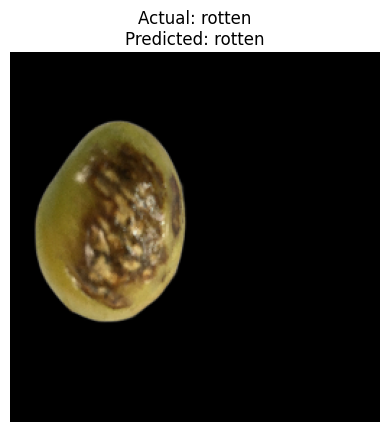

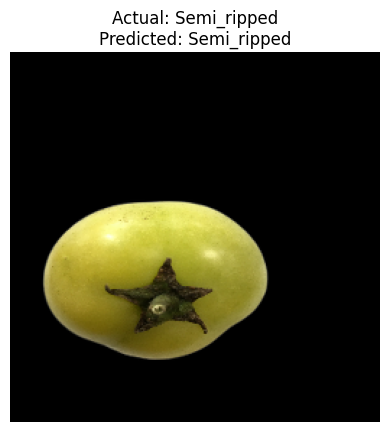

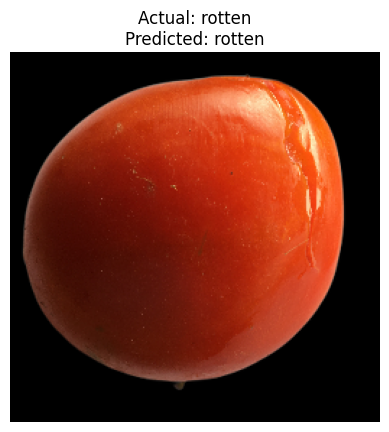

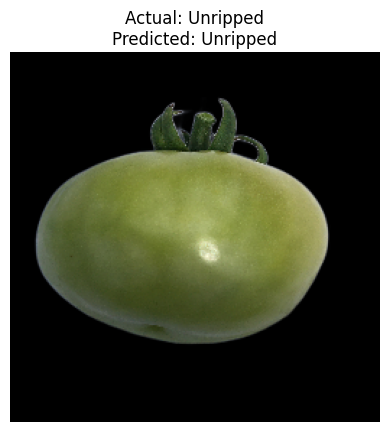

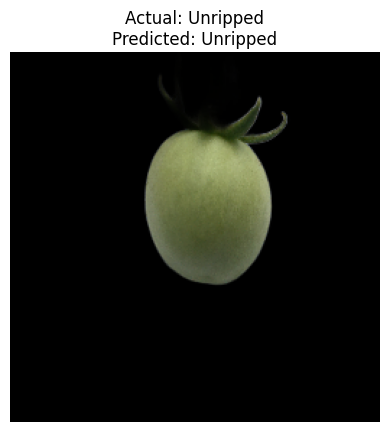

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Optional: Ensure eager execution is enabled (typically already is in TF 2.x)
tf.config.run_functions_eagerly(True)

# Loop through all batches in the test dataset
for images_batch, labels_batch in test_ds:
    # Convert batch to NumPy arrays
    images_np = images_batch.numpy().astype('uint8')
    labels_np = labels_batch.numpy()

    # Predict the batch
    batch_prediction = model.predict(images_batch)

    # Loop through each image in the batch
    for i in range(len(images_np)):
        image = images_np[i]
        label = labels_np[i]

        # Get predicted label
        predicted_index = np.argmax(batch_prediction[i])
        predicted_class = class_names[predicted_index]

        # Show the image with actual & predicted label
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Actual: {class_names[label]}\nPredicted: {predicted_class}")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


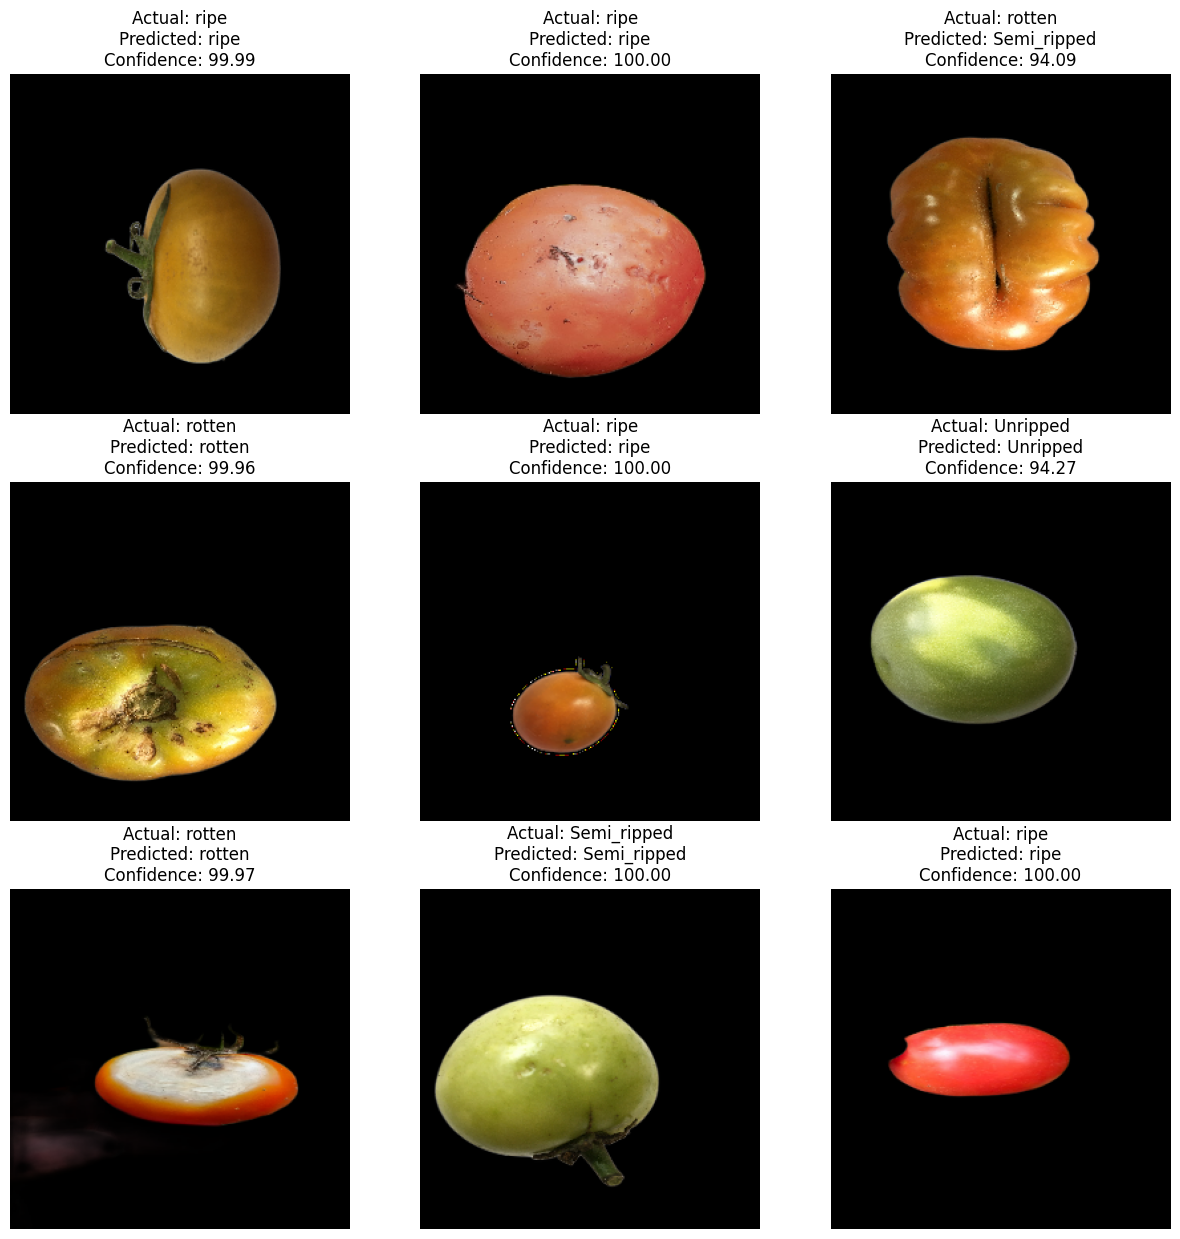

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}"
        )
        plt.axis("off")


In [23]:
model.save("tomato_final_model.keras")


In [24]:
# i want model to train itself using a color

In [25]:
#I want to model to train model to look if there is presence of large pores

In [26]:
#For lalit
#from tensorflow import keras
# model = keras.models.load_model("tomato_final_model.keras")


# Evaluation metrics

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


<Figure size 1000x800 with 0 Axes>

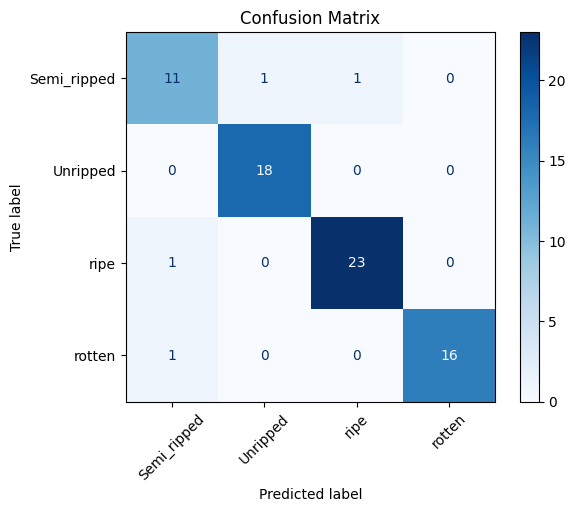

In [28]:
y_true, y_pred = [], []

for x, y in test_ds:
    preds = model.predict(x)
    y_true.extend(y.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)

plt.figure(figsize=(10, 8))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


# Classificaton metrics


In [32]:
 from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

 Semi_ripped       0.85      0.85      0.85        13
    Unripped       0.95      1.00      0.97        18
        ripe       0.96      0.96      0.96        24
      rotten       1.00      0.94      0.97        17

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


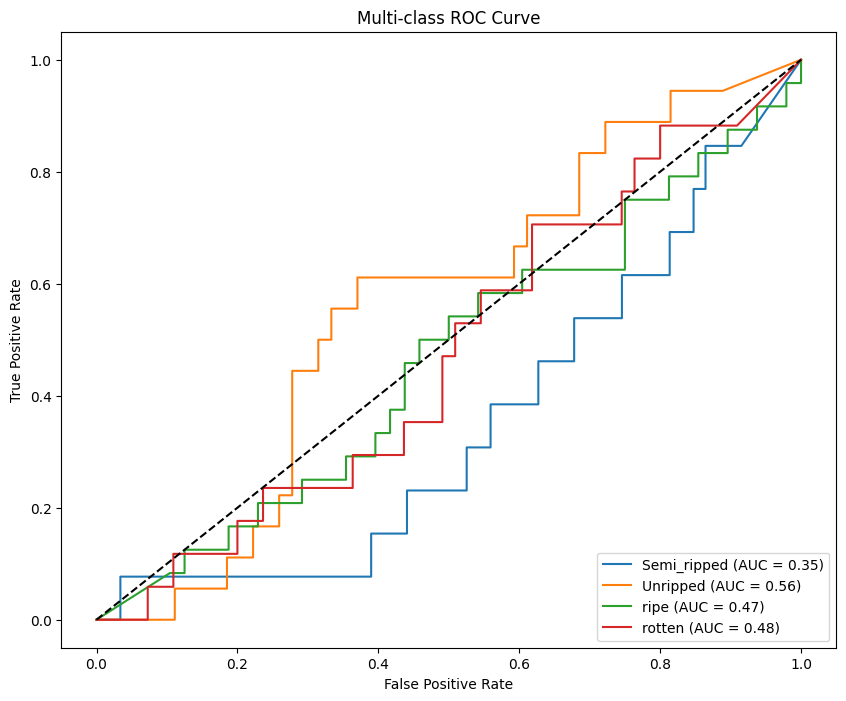

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels for multi-class ROC
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# Get predicted probabilities for each class (softmax output)
y_score = []
for x_batch, _ in test_ds:
    preds = model.predict(x_batch)
    y_score.append(preds)
y_score = np.vstack(y_score)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.show()
